In [75]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [76]:
# implement 2D-DFT
def dft_2D(x):
    M, N = x.shape
    U, V = x.shape
    X = np.zeros((U, V), dtype=np.complex128)
        
    for u in range(U):
        n = np.arange(N)
        v = np.arange(N).reshape((N, 1))
        # X[u, :] = np.dot(np.exp(-2j * np.pi * v * n / N), x[u, :])
        X[u, :] = np.fft.fft(x[u, :])

    for v in range(V):
        m = np.arange(M)
        u = np.arange(M).reshape((M, 1))
        # X[:, v] = np.dot(np.exp(-2j * np.pi * u * m / M), x[:, v])
        X[:, v] = np.fft.fft(x[:, v])
        
    return X

# implement 2D-IDFT
def idft_2D(X):
    U, V = X.shape
    M, N = X.shape
    x = np.zeros((M, N), dtype=np.complex128)
        
    for m in range(M):
        n = np.arange(N)
        v = np.arange(N).reshape((N, 1))
        # x[m, :] = np.dot(np.exp(2j * np.pi * v * n / N), X[m, :])
        x[m, :] = np.fft.ifft(X[m, :])

    for n in range(N):
        m = np.arange(M)
        u = np.arange(M).reshape((M, 1))
        # x[:, n] = np.dot(np.exp(2j * np.pi * u * m / M), X[:, n])
        x[:, n] = np.fft.ifft(X[:, n])
        
    return x

(574, 569)

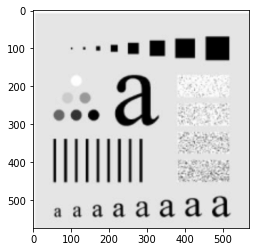

In [77]:
img = cv2.imread('../../images/Alphabet.png', 0)
plt.imshow(img, cmap='gray')
plt.imsave('original.png', img, cmap='gray')
img.shape

# Ideal LPF

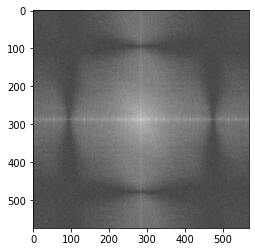

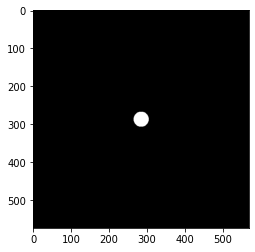

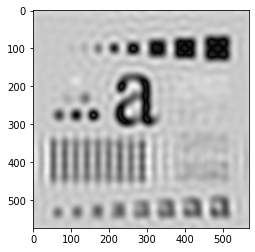

In [78]:
# implement ideal low pass filter
def ideal_lpf(img:np.ndarray, D0) -> np.ndarray:
    M, N = img.shape
    U, V = img.shape
    
    X = np.fft.fft2(img, axes=(0,1))
    X = np.fft.fftshift(X)
    H = np.zeros((U, V))
    
    for u in range(U):
        for v in range(V):
            D = np.sqrt((u - U/2)**2 + (v - V/2)**2)
            if D <= D0:
                H[u, v] = 1
            else:
                H[u, v] = 0
    Y = X * H 

    y = np.fft.ifftshift(Y)
    y = np.fft.ifft2(y, axes=(0,1))
    y = np.abs(y)
    return X, H, y


X, H, y_ideal = ideal_lpf(img, 20)

plt.imshow(np.log(np.abs(X)), cmap='gray');
plt.show()
plt.imshow(H, cmap='gray')
plt.show()
plt.imshow(y_ideal, cmap='gray')
plt.show()
plt.imsave('ideal_lpf.png', y_ideal, cmap='gray')

# Butterworth LPF

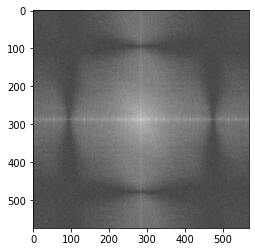

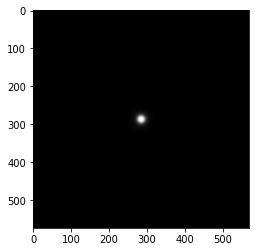

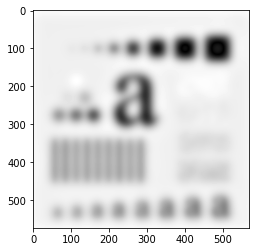

In [79]:
# Implement Butterworth low pass filter
def butterworth_lpf(img:np.ndarray, D0, n) -> np.ndarray:
    M, N = img.shape
    U, V = img.shape

    X = np.fft.fft2(img, axes=(0,1))
    X = np.fft.fftshift(X)
    H = np.zeros((U, V))
    
    for u in range(U):
        for v in range(V):
            D = np.sqrt((u - U/2)**2 + (v - V/2)**2)
            H[u, v] = 1 / (1 + (D / D0)**(2*n))

    Y = X * H

    y = np.fft.ifftshift(Y)
    y = np.fft.ifft2(y, axes=(0,1))
    y = np.abs(y)
    return X, H, y

X, H, y_butterworth = butterworth_lpf(img, 10, 2)

plt.imshow(np.log(np.abs(X)), cmap='gray');
plt.show()
plt.imshow(H, cmap='gray')
plt.show()
plt.imshow(y_butterworth, cmap='gray');
plt.show()
plt.imsave('butterworth_lpf.png', y_butterworth, cmap='gray')

# Gaussian LPF

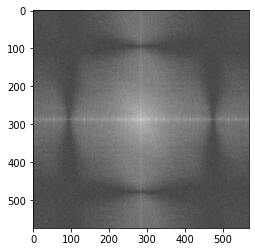

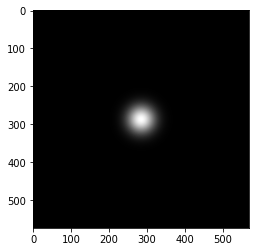

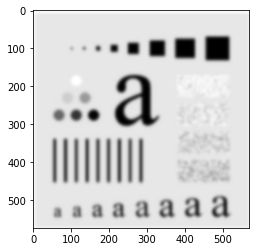

In [80]:
# Implement Gaussian low pass filter
def gaussian_lpf(img:np.ndarray, D0) -> np.ndarray:
    M, N = img.shape
    U, V = img.shape
    
    X = np.fft.fft2(img, axes=(0,1))
    X = np.fft.fftshift(X)
    
    H = np.zeros((U, V))
    for u in range(U):
        for v in range(V):
            D = np.sqrt((u - U/2)**2 + (v - V/2)**2)
            H[u, v] = np.exp(-D**2 / (2 * D0**2))

    Y = X * H

    y = np.fft.ifftshift(Y)
    y = np.fft.ifft2(y, axes=(0,1))
    y = np.abs(y)
    return X, H, y

X, H, y_gaussian = gaussian_lpf(img, 25)

plt.imshow(np.log(np.abs(X)), cmap='gray');
plt.show()
plt.imshow(H, cmap='gray')
plt.show()
plt.imshow(y_gaussian, cmap='gray');
plt.imsave('gaussian_lpf.png', y_gaussian, cmap='gray')